## Importing libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Preprocessing

### Training Image preprocessing

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


### Validation Image Preprocessing

In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [4]:
training_set

<BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [5]:
for  x, y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[173.75 170.75 177.75]
   [173.   170.   177.  ]
   [176.   173.   180.  ]
   ...
   [149.75 144.75 148.75]
   [144.25 139.25 143.25]
   [149.5  144.5  148.5 ]]

  [[170.5  167.5  174.5 ]
   [171.25 168.25 175.25]
   [174.   171.   178.  ]
   ...
   [149.75 144.75 148.75]
   [142.   137.   141.  ]
   [142.75 137.75 141.75]]

  [[174.75 171.75 178.75]
   [174.25 171.25 178.25]
   [171.25 168.25 175.25]
   ...
   [143.75 138.75 142.75]
   [149.5  144.5  148.5 ]
   [146.75 141.75 145.75]]

  ...

  [[177.   176.   182.  ]
   [176.   175.   181.  ]
   [174.75 173.75 179.75]
   ...
   [145.   140.   146.  ]
   [147.75 142.75 148.75]
   [150.5  145.5  151.5 ]]

  [[175.5  174.5  180.5 ]
   [176.75 175.75 181.75]
   [178.   177.   183.  ]
   ...
   [143.25 138.25 144.25]
   [147.   142.   148.  ]
   [150.5  145.5  151.5 ]]

  [[175.   174.   180.  ]
   [174.5  173.5  179.5 ]
   [174.   173.   179.  ]
   ...
   [136.25 131.25 137.25]
   [137.   132.   138.  ]
   [141.5  136.5  14

## Building Model

In [6]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.models import Sequential

In [7]:
model = Sequential()

In [8]:
## Building Convolution Layer

In [9]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu', input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [10]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [11]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [12]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [13]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [14]:
model.add(Dropout(0.25)) # To avoid Overfitting

In [15]:
model.add(Flatten())

In [16]:
model.add(Dense(units=1500,activation='relu'))

In [17]:
model.add(Dropout(0.4))

In [18]:
#Output Layer
model.add(Dense(units=38,activation='softmax'))

## Compiling Model

In [19]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

## Model Training

In [21]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=5)

Epoch 1/5
2197/2197 [==============================] - 34433s 16s/step - loss: 1.4771 - accuracy: 0.5661 - val_loss: 0.6287 - val_accuracy: 0.8048
Epoch 2/5
2197/2197 [==============================] - 35351s 16s/step - loss: 0.4936 - accuracy: 0.8435 - val_loss: 0.2684 - val_accuracy: 0.9150
Epoch 3/5
2197/2197 [==============================] - 34566s 16s/step - loss: 0.2827 - accuracy: 0.9085 - val_loss: 0.2096 - val_accuracy: 0.9306
Epoch 4/5
2197/2197 [==============================] - 34524s 16s/step - loss: 0.1882 - accuracy: 0.9382 - val_loss: 0.2377 - val_accuracy: 0.9231
Epoch 5/5
2197/2197 [==============================] - 35159s 16s/step - loss: 0.1468 - accuracy: 0.9518 - val_loss: 0.1683 - val_accuracy: 0.9480


## Model Evaluation

In [23]:
#Model Evaluation on Training set
train_loss,train_acc = model.evaluate(training_set)

2197/2197 [==============================] - 9204s 4s/step - loss: 3.9664 - accuracy: 0.0332


In [24]:
print(train_loss,train_acc)

3.9664008617401123 0.03321715444326401


In [25]:
#Model on Validation set
val_loss,val_acc = model.evaluate(validation_set)

550/550 [==============================] - 2371s 4s/step - loss: 3.9686 - accuracy: 0.0322


In [26]:
print(val_loss,val_acc)

3.9686100482940674 0.0322103351354599


### Saving Model

In [22]:
model.save("trained_model.keras")

In [23]:
training_history.history #Return Dictionary of history

{'loss': [1.4771251678466797,
  0.4936314821243286,
  0.282674103975296,
  0.1882377564907074,
  0.14675138890743256],
 'accuracy': [0.5661142468452454,
  0.8434881567955017,
  0.9084714651107788,
  0.9381890892982483,
  0.9517604112625122],
 'val_loss': [0.6286945939064026,
  0.2683541774749756,
  0.20959290862083435,
  0.2377266138792038,
  0.1682971864938736],
 'val_accuracy': [0.8048030734062195,
  0.9150353074073792,
  0.9305713772773743,
  0.9230594038963318,
  0.9480423331260681]}

In [24]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

### Accuracy Visualization

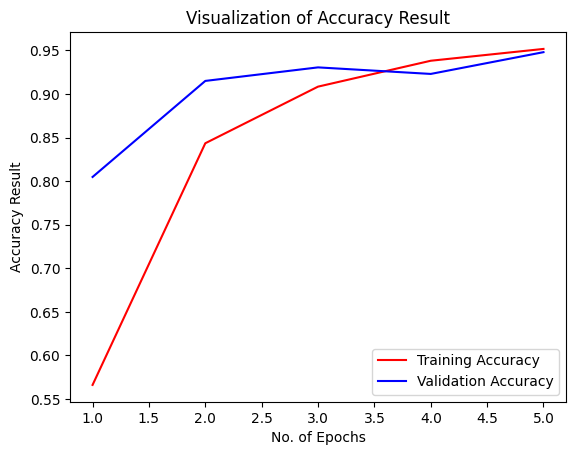

In [30]:
epochs = [i for i in range(1,6)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

### Some other metrics for model evaluation

In [32]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [27]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [28]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

(array([[9.99416947e-01, 5.51437668e-04, 1.26625919e-08, ...,
         1.72151605e-12, 5.85554938e-11, 6.90714708e-11],
        [9.98756170e-01, 1.02603214e-03, 5.07018605e-08, ...,
         2.35865355e-10, 9.97462779e-10, 5.63569458e-09],
        [9.99994993e-01, 5.13508326e-07, 3.95016864e-09, ...,
         4.88583037e-14, 9.00511176e-12, 8.70109748e-11],
        ...,
        [1.28152395e-08, 3.99535321e-10, 1.23305568e-07, ...,
         1.68627612e-09, 1.03595556e-10, 9.99993801e-01],
        [2.18622063e-08, 3.17764870e-10, 9.03603734e-08, ...,
         6.82111967e-09, 1.70444173e-10, 9.99995708e-01],
        [2.25002267e-07, 1.76667470e-07, 4.93944242e-07, ...,
         2.23407941e-08, 1.64353224e-07, 9.99077559e-01]], dtype=float32),
 (17572, 38))

In [33]:
predicted_categories = tf.argmax(y_pred, axis=1)

In [34]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [35]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [39]:
Y_true = tf.argmax(true_categories, axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [43]:
from sklearn.metrics import classification_report, confusion_matrix

In [44]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.93      0.95      0.94       504
                                 Apple___Black_rot       0.91      0.99      0.95       497
                          Apple___Cedar_apple_rust       0.99      0.90      0.95       440
                                   Apple___healthy       0.96      0.87      0.91       502
                               Blueberry___healthy       0.94      0.96      0.95       454
          Cherry_(including_sour)___Powdery_mildew       0.95      0.99      0.97       421
                 Cherry_(including_sour)___healthy       0.98      0.99      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.93      0.92      0.92       410
                       Corn_(maize)___Common_rust_       1.00      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.91      0.96      0.

In [45]:
cm = confusion_matrix(Y_true,predicted_categories)
cm

array([[479,   6,   0, ...,   0,   0,   0],
       [  0, 494,   0, ...,   0,   0,   0],
       [  1,   0, 398, ...,   1,   0,   5],
       ...,
       [  0,   0,   0, ..., 485,   0,   0],
       [  0,   1,   0, ...,   0, 438,   0],
       [  0,   0,   0, ...,   0,   0, 449]], dtype=int64)

### Confusion Matrix Visualization

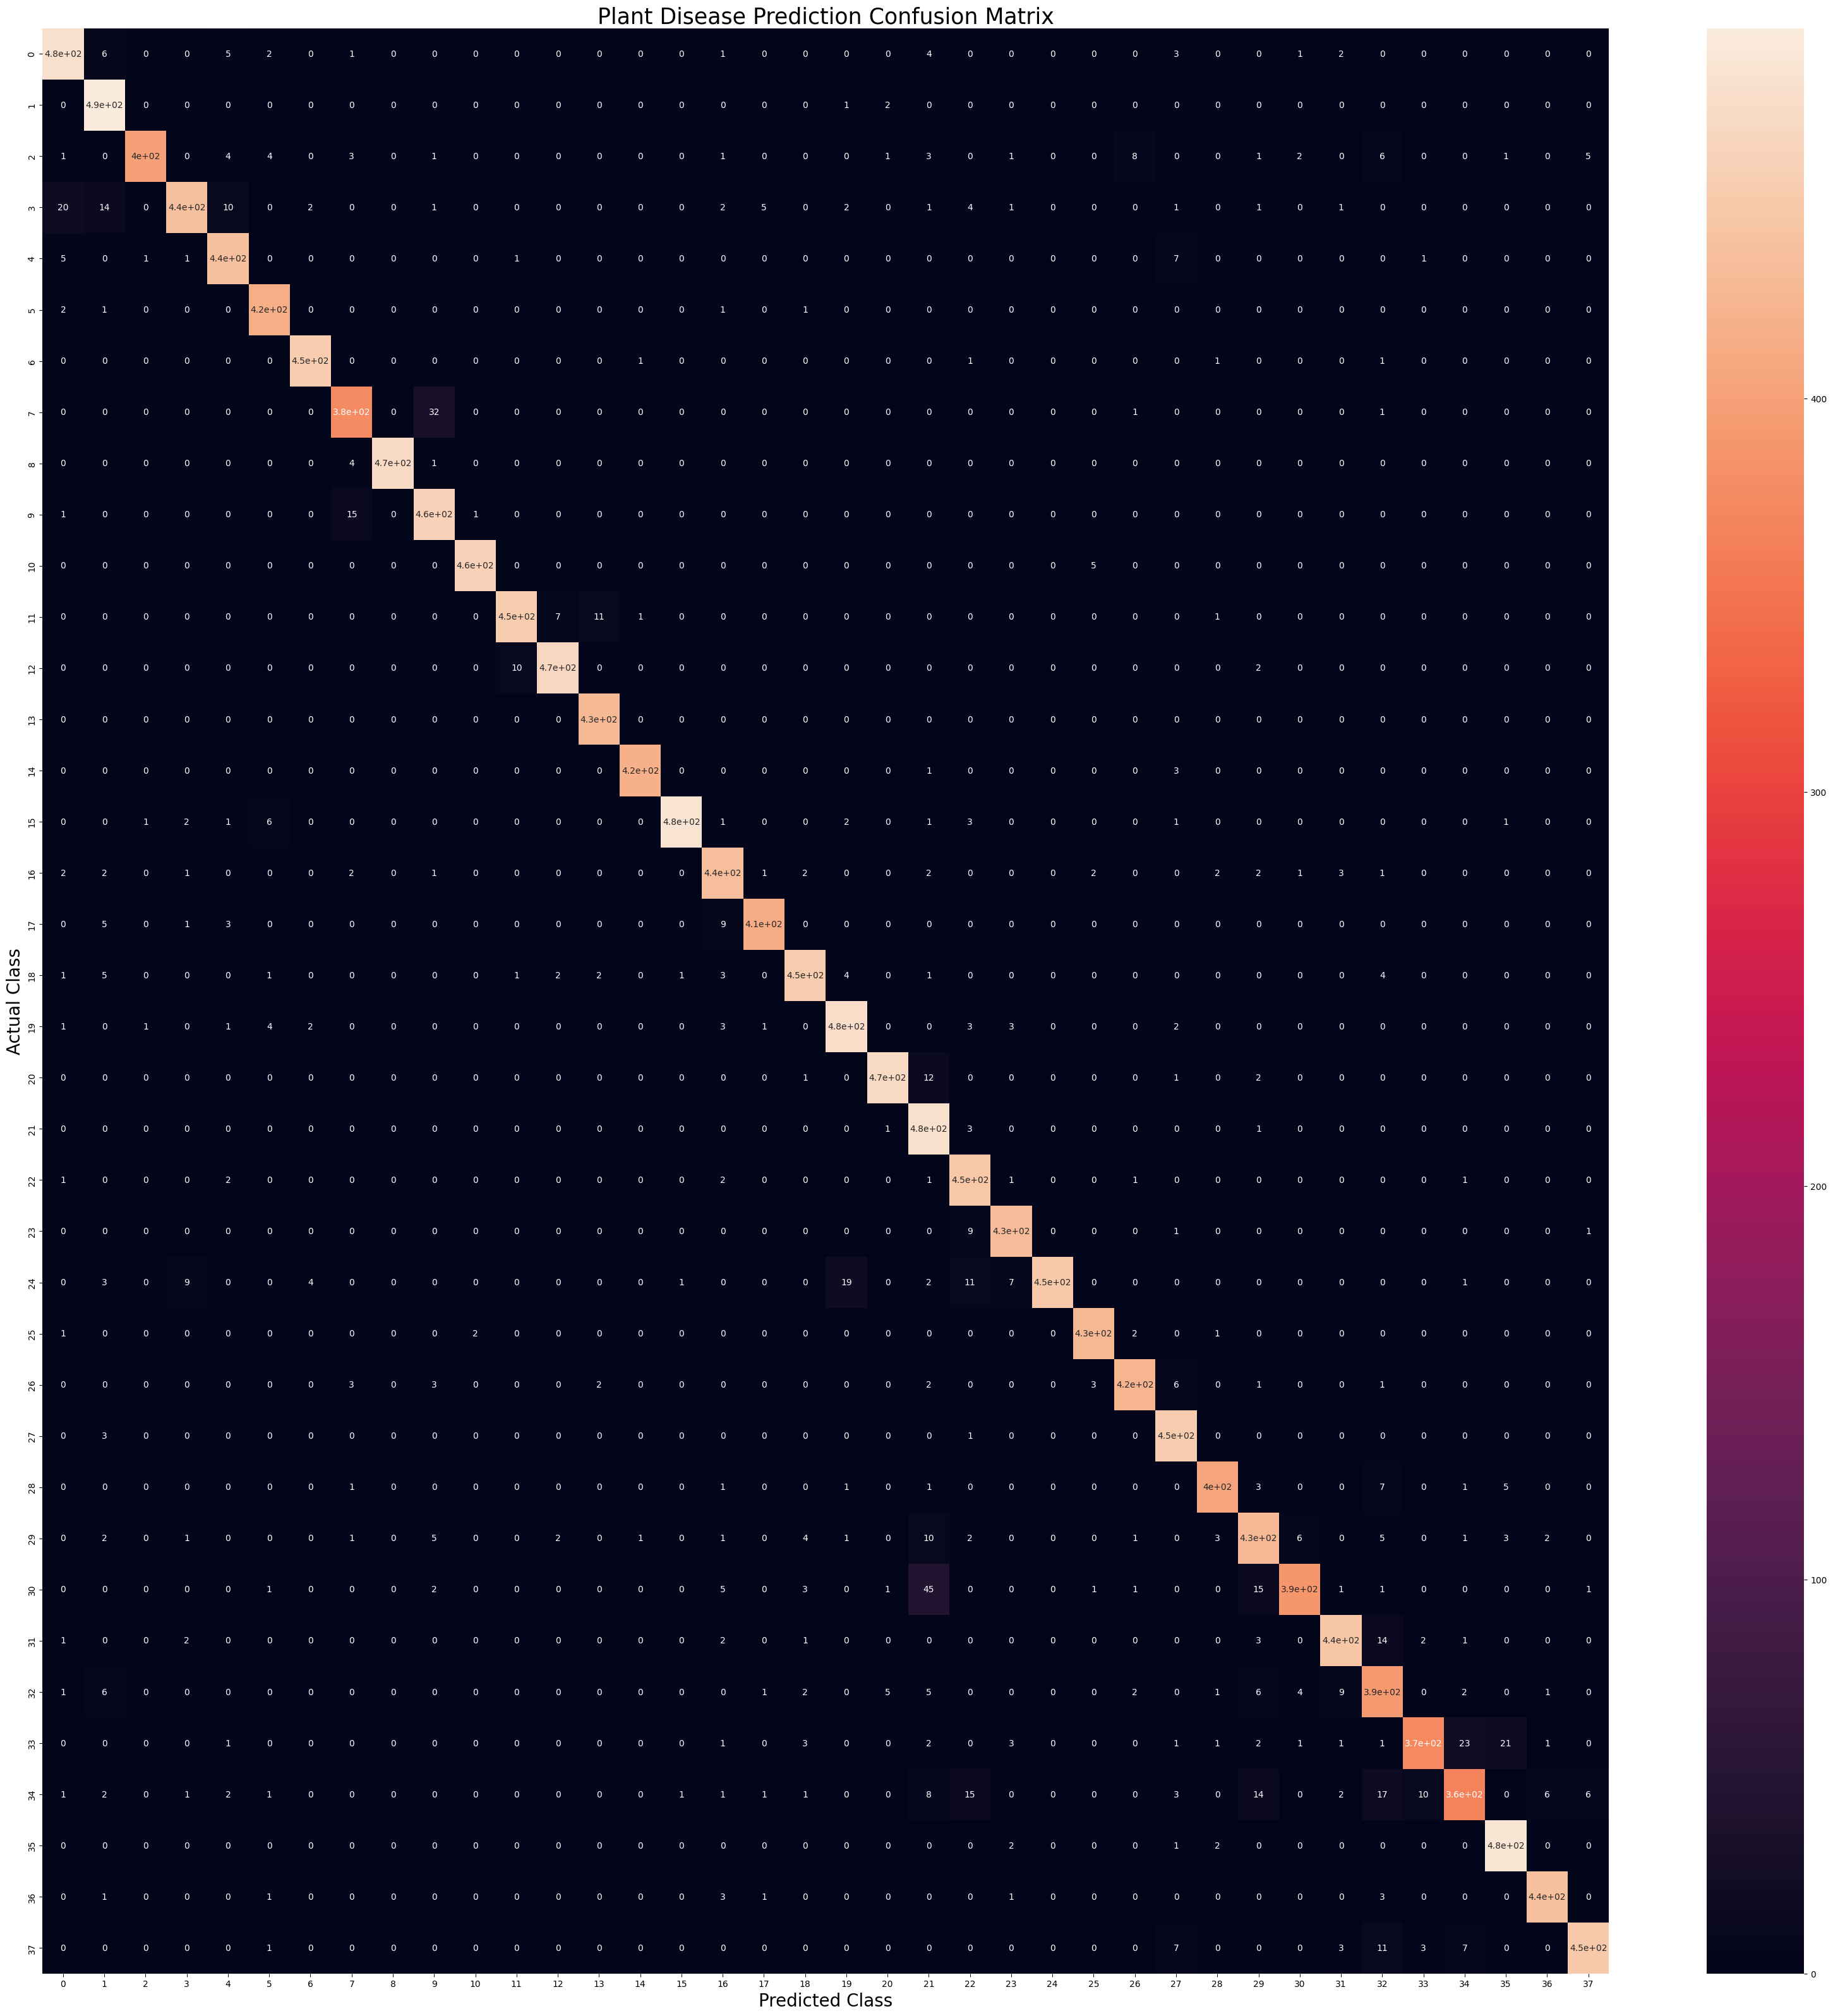

In [46]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})
plt.xlabel('Predicted Class',fontsize=20)
plt.ylabel('Actual Class',fontsize=20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize=25)
plt.show()